<a href="https://colab.research.google.com/github/stmulugheta/Capstone-Project/blob/main/pascal_voc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/omdena-project

/content/drive/MyDrive/omdena-project


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm

In [ ]:
path = '/content/drive/MyDrive/omdena-project/dataset/agri_data/data_2'

In [ ]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [ ]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpeg')]

In [ ]:
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

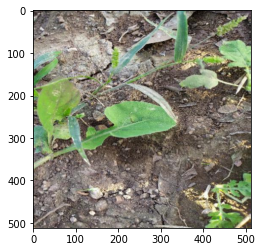

In [ ]:
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

In [ ]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-5]+'.txt','r') 
    head, tail = os.path.split(id[:-5])
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = tail
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 1300/1300 [00:05<00:00, 251.67it/s]


In [ ]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,agri_0_5693,1,0.337891,0.504883,0.667969,0.427734
1,agri_0_773,0,0.438477,0.564453,0.751953,0.871094
2,agri_0_8034,0,0.491211,0.523438,0.919922,0.597656
3,agri_0_8034,0,0.645508,0.152344,0.607422,0.296875
4,agri_0_6707,0,0.501953,0.459961,0.996094,0.650391


In [ ]:
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']

In [ ]:
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 512
    pascal_voc.loc[i,'height']= 512  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'crop'
    else:
        pascal_voc.loc[i,'class'] = 'weed'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*512)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*512)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*512) 

100%|██████████| 2072/2072 [00:03<00:00, 546.92it/s]


In [ ]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,agri_0_5693,512,512,weed,2,149,344,368
1,agri_0_773,512,512,crop,32,65,417,512
2,agri_0_8034,512,512,crop,16,115,487,421
3,agri_0_8034,512,512,crop,175,2,486,154
4,agri_0_6707,512,512,crop,1,68,512,402
...,...,...,...,...,...,...,...,...
2067,agri_0_376,512,512,crop,345,23,511,260
2068,agri_0_2863,512,512,weed,52,22,275,263
2069,agri_0_2863,512,512,weed,387,56,504,270
2070,agri_0_3284,512,512,crop,24,38,472,505


In [ ]:
path1='/content/drive/MyDrive/omdena-project/'
any_index_number = 3 #change this number for different images
test_img = cv2.cvtColor(cv2.imread(path+pascal_voc.loc[any_index_number,'filename']),cv2.COLOR_BGR2RGB)
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)
for i in range(len(test_df)):
    
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']-10), cv2.FONT_HERSHEY_SIMPLEX,1, (255,255,0), 2, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

In [ ]:
pascal_voc.to_csv('pascal_voc_format.csv',index=False)

In [ ]:
!pip install lxml

In [ ]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

loc = '/content/drive/MyDrive/omdena-project/dataset/xml/'

fields = ['filename', 'class', 'xmin', 'ymin', 'width', 'height', 'xmax', 'ymax']
df = pd.read_csv('/content/drive/MyDrive/omdena-project/pascal_voc_format.csv', usecols=fields)


# Change the name of the file.
# This will replace the / with -
def nameChange(x):
    x = x.replace("/", "-")
    return x


df['filename'] = df['filename'].apply(nameChange)

for i in range(0, 1300):
    height = df['height'].iloc[i]
    width = df['width'].iloc[i]
    classn= df['class'].iloc[i]
    depth = 3

    annotation = ET.Element('annotation')
    ET.SubElement(annotation, 'folder').text = 'images'
    ET.SubElement(annotation, 'filename').text = str(df['filename'].iloc[i])
    ET.SubElement(annotation, 'segmented').text = '0'
    size = ET.SubElement(annotation, 'size')
    ET.SubElement(size, 'width').text = str(width)
    ET.SubElement(size, 'height').text = str(height)
    ET.SubElement(size, 'depth').text = str(depth)
    ob = ET.SubElement(annotation, 'object')
    ET.SubElement(ob, 'class').text = str(classn)
    ET.SubElement(ob, 'pose').text = 'Unspecified'
    ET.SubElement(ob, 'truncated').text = '0'
    ET.SubElement(ob, 'difficult').text = '0'
    bbox = ET.SubElement(ob, 'bndbox')
    ET.SubElement(bbox, 'xmin').text = str(df['xmin'].iloc[i])
    ET.SubElement(bbox, 'ymin').text = str(df['ymin'].iloc[i])
    ET.SubElement(bbox, 'xmax').text = str(df['xmax'].iloc[i])
    ET.SubElement(bbox, 'ymax').text = str(df['ymax'].iloc[i])

    fileName = str(df['filename'].iloc[i])
    tree = ET.ElementTree(annotation)
    tree.write(loc+fileName + ".xml", encoding='utf8')

In [ ]:
pwd

'/content/drive/My Drive/omdena-project'